# Assignment-4 :: ICP-4

## 1. Data Manipulation

In [20]:
# Imports
import pandas as pd

In [21]:
# a. Read the provided CSV file ‘data.csv’

# Path of the csv
data_path = 'data/data.csv'

# Read csv using pandas
data_df = pd.read_csv(data_path)

# Shape (rows, columns)
data_df.shape

(169, 4)

In [22]:
# c. Show the basic statistical description about the data.
data_df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [23]:
# d. Check if the data has null values.
data_df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [24]:
# i. Replace null values with the mean
data_df.fillna(data_df.mean(), inplace=True)

data_df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [25]:
# e. Select at least two columns and aggregate the data using: min, max, count, mean.

# Select two columns in a list - Duration & Calories
aggregate_columns = ['Duration', 'Calories']

# Aggregate the data by min, max, count, mean for these two columns
aggregated_data = data_df[aggregate_columns].agg(['min', 'max', 'count', 'mean'])

# Print the aggregated
print(aggregated_data)

         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [26]:
# f. Filter the dataframe to select the rows with calories values between 500 and 1000.
filtered_data_by_calories = data_df[(data_df['Calories'] >= 500) & (data_df['Calories'] <= 1000)]
print(filtered_data_by_calories)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [27]:
# g. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
filtered_data_df = data_df[(data_df['Calories'] > 500) & (data_df['Pulse'] < 100)]
print(filtered_data_df)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [28]:
# h. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.
df_modified = data_df.drop(columns=['Maxpulse'])
print('data_df columns: {}'.format(data_df.columns))
print('df_modified columns: {}'.format(df_modified.columns))

data_df columns: Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')
df_modified columns: Index(['Duration', 'Pulse', 'Calories'], dtype='object')


In [29]:
# i. Delete the “Maxpulse” column from the main df dataframe
print('Before deleting maxpulse, data_df columns: {}'.format(data_df.columns))
data_df.drop(columns=['Maxpulse'], inplace=True)
print('After deleting maxpulse, data_df columns: {}'.format(data_df.columns))

Before deleting maxpulse, data_df columns: Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')
After deleting maxpulse, data_df columns: Index(['Duration', 'Pulse', 'Calories'], dtype='object')


In [30]:
# j. Convert the datatype of Calories column to int datatype.
print('Before converting to int, Calorie datatype: {}'.format(data_df['Calories'].dtype))
data_df['Calories'] = data_df['Calories'].astype(int)
print('After converting to int, Calorie datatype: {}'.format(data_df['Calories'].dtype))

Before converting to int, Calorie datatype: float64
After converting to int, Calorie datatype: int64


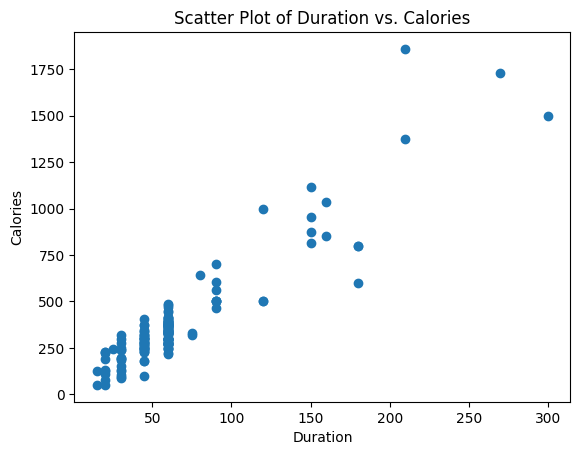

In [31]:
# k. Using pandas, create a scatter plot for the two columns (Duration and Calories).

# Import scatterplot
import matplotlib.pyplot as plt

# Draw basic plot - Duration Vs Calories
plt.scatter(data_df['Duration'], data_df['Calories'])

# Set x and y labels
plt.xlabel('Duration')
plt.ylabel('Calories')

# Set plot title
plt.title('Scatter Plot of Duration vs. Calories')

# Display the graph
plt.show()

## 2. Linear Regression

In [12]:
# Required imports

# Dataframe related
import pandas as pd

# Model related
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Plotting related
import matplotlib.pyplot as plt

In [32]:
# a. Import the given "Salary_Data.csv"

# Path of the csv
salary_data_path = 'data/Salary_Data.csv'

# Read csv using pandas
salary_data_df = pd.read_csv(salary_data_path)

# Shape (rows, columns)
salary_data_df.shape

(30, 2)

In [33]:
# b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
X = salary_data_df.iloc[:, :-1]
y = salary_data_df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [34]:
# c. Train and predict the model

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict using the trained model
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [35]:
# d. Calculate the mean_squared error
mean_squared_error_train = mean_squared_error(y_train, y_pred_train)
mean_squared_error_test = mean_squared_error(y_test, y_pred_test)
print("mean_squared_error_train:", mean_squared_error_train)
print("mean_squared_error_test:", mean_squared_error_test)

mean_squared_error_train: 36852948.76438455
mean_squared_error_test: 21026037.329511296


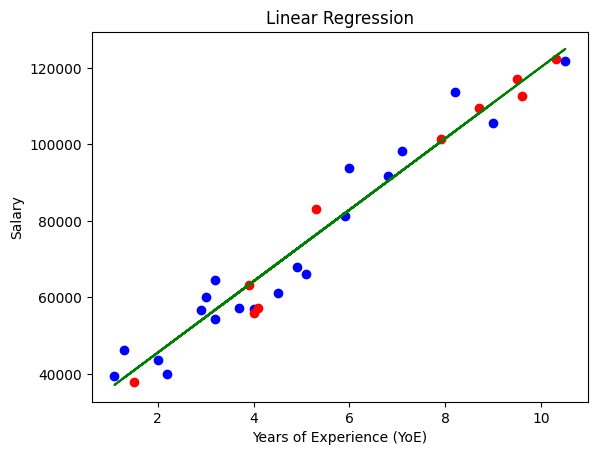

In [36]:
# e. Visualize both train and test data using

# Plot the points
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Add the regression line
plt.plot(X_train, y_pred_train, color='green', label='Regression Line (Train)')

plt.xlabel('Years of Experience (YoE)')
plt.ylabel('Salary')
plt.title('Linear Regression')

# Display
plt.show()